# Límites del Método de Euler 

Nuestro problema central es el siguiente:
$$
\begin{cases}
\frac{dx}{dt}&=f(t,x) \\
x(t_0)&=x_0
\end{cases}
$$

O sea, **el cambio instantáneo de $x$ en el tiempo $t$**, se puede modelar mediante la función $f(t,x)$ y se comienza el experimento en el tiempo $t_0$.

Recordemos, el **Método de Euler** se reduce a la siguiente fórmula:

$x(t+h)=x(t)+hf(t,x(t))$

Que, en lenguaje Python, se escribe

```x[i+1]=x[i]+h*f(t[i],x[i])```

usando el loop ```for``` respectivo.

Podríamos pensar que éste métodos nos sirve para resolver todos los problemas existentes de ecuaciones diferenciales. 

**Esto no es verdad**.

Veremos a continuación un ejemplo donde el método falla de forma desastroza.

Consideremos
$$
\begin{cases}
y'-y &= -\frac{1}{2}e^{\frac{t}{2}}\sin(5t)+5e^{\frac{t}{2}}\cos(5t)\\
y(0)&=0
\end{cases}
$$

Ésta es una ecuación lineal que puede ser resuelta con un factor integrante (¡Hacerlo!) y cuya solución exacta es:

$$y(t)=e^{\frac{t}{2}}\sin(5t)$$

Miremos cómo actúa el método de Euler frente a este problema:

In [1]:
import sys
sys.path.append("/home/daniel/Notebooks/Python/Modulos/EDO") # Append Modules from given Path
print(sys.path)

['/home/daniel/Notebooks/Python/Matematicas/Modelamiento/Deterministico/ODE/First_Order/Numerical_Methods/Explicit/1D', '/home/daniel/anaconda3/envs/tf2/lib/python37.zip', '/home/daniel/anaconda3/envs/tf2/lib/python3.7', '/home/daniel/anaconda3/envs/tf2/lib/python3.7/lib-dynload', '', '/home/daniel/anaconda3/envs/tf2/lib/python3.7/site-packages', '/home/daniel/anaconda3/envs/tf2/lib/python3.7/site-packages/IPython/extensions', '/home/daniel/.ipython', '/home/daniel/Notebooks/Python/Modulos/EDO']


Error Cuadrático Medio Euler: 25.29816141231471


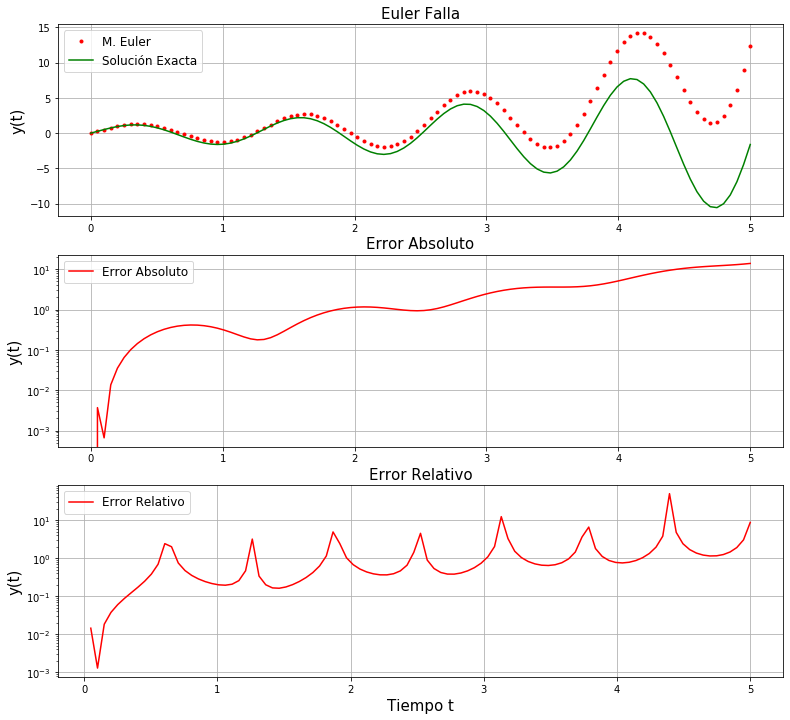

In [2]:
from Solver_EDO import *
import matplotlib.pyplot as plt

### Hiper-Parámetros (Física)###
#Param. Exp.
#No hay

### Modelo ###
f=lambda t,y:-1/2*np.exp(t/2)*np.sin(5*t)+5*np.exp(t/2)*np.cos(5*t)+y

#Condición Inicial
y0=0
#Intervalo de Tiempo (Tiempo inicial, tiempo final)
T=[0,5]

#### Parámetros Numéricos#####
n=100
##############################################

# Solución Numérica
t,yeu=EulerM(f,y0,T,n)

# Solución Exacta, Analítica, Real (Wolfram-Alpha)
y_ex=np.exp(t/2)*np.sin(5*t)


###############Errores###################33

#Error Abs
err_abse=Error_Abs(yeu,y_ex)
# Calcular el error relativo
err_re=Error_Rela(yeu[1:],y_ex[1:])
# ECM Euler
MSME = np.square(np.subtract(y_ex,yeu)).mean()
print("Error Cuadrático Medio Euler:",MSME)

############ Gráficos ############################

plt.figure(figsize=(13,12))

plt.subplot(311)
plt.plot(t,yeu,'r.',label="M. Euler")
plt.plot(t,y_ex,'g',label="Solución Exacta")
plt.title("Euler Falla",fontsize=15)
plt.ylabel("y(t)",fontsize=15)
plt.legend(fontsize=12)
plt.grid()

plt.subplot(312)
plt.semilogy(t,err_abse,'r',label="Error Absoluto")
plt.title("Error Absoluto",fontsize=15)
plt.ylabel("y(t)",fontsize=15)
plt.legend(fontsize=12)
plt.grid()

plt.subplot(313)
plt.semilogy(t[1:],err_re,'r',label="Error Relativo")
plt.title("Error Relativo",fontsize=15)
plt.xlabel("Tiempo t",fontsize=15)
plt.ylabel("y(t)",fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

Cómo vemos, el método de Euler falla de manera drástica.

**Es un desastre**.

La razón de esto es que la función $f(t,x)$ de cambio oscila demasiado (es suma de senos y cosenos), y por lo tanto la solución numérica se desastibiliza por estas oscilaciones.

Le dejamos al lector chequear que al ahcer más grande $n$, la aproximación mejora, pero si vamos más hacia el futuro en el tiempo, hay un punto dónde el error se hace muy grande y no podemos obtener una solución numérica que represente a la solución exacta.

En la próxima sesión, veremos cómo podemos mejorar la situación: esto es, mejorar el método numérico de Euler y transformarlo en un nuevo método numérico llamado **el método de Runge-Kutta**.

A continuación los resultados pertinentes y esperados.

Error Cuadrático Medio Euler: 25.29816141231471
Error Cuadrático Medio RK4  : 6.719036372960153e-15


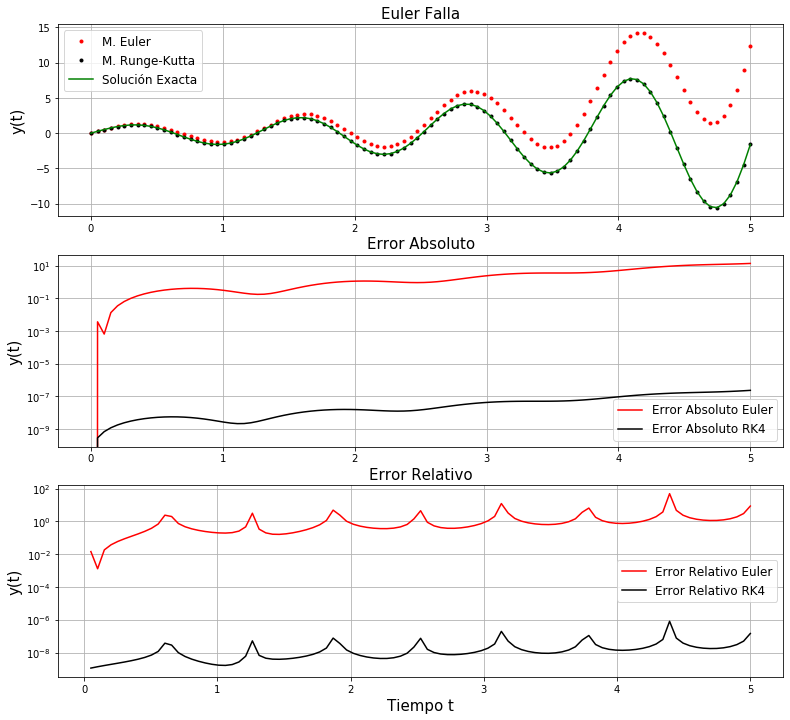

In [4]:
# Solución Numérica
t,yku=DP(f,y0,T,n)

###############Errores###################33

#Error Abs
err_absk=Error_Abs(yku,y_ex)
# Calcular el error relativo
err_rk=Error_Rela(yku[1:],y_ex[1:])
# ECM Euler
MSMK = np.square(np.subtract(y_ex,yku)).mean()
print("Error Cuadrático Medio Euler:",MSME)
print("Error Cuadrático Medio RK4  :",MSMK)

############ Gráficos ############################b

plt.figure(figsize=(13,12))

plt.subplot(311)
plt.plot(t,yeu,'r.',label="M. Euler")
plt.plot(t,yku,'k.',label="M. Runge-Kutta")
plt.plot(t,y_ex,'g',label="Solución Exacta")
plt.title("Euler Falla",fontsize=15)
plt.ylabel("y(t)",fontsize=15)
plt.legend(fontsize=12)
plt.grid()

plt.subplot(312)
plt.semilogy(t,err_abse,'r',label="Error Absoluto Euler")
plt.semilogy(t,err_absk,'k',label="Error Absoluto RK4")
plt.title("Error Absoluto",fontsize=15)
plt.ylabel("y(t)",fontsize=15)
plt.legend(fontsize=12)
plt.grid()

plt.subplot(313)
plt.semilogy(t[1:],err_re,'r',label="Error Relativo Euler")
plt.semilogy(t[1:],err_rk,'k',label="Error Relativo RK4")
plt.title("Error Relativo",fontsize=15)
plt.xlabel("Tiempo t",fontsize=15)
plt.ylabel("y(t)",fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

## Tarea

- ¿Qué método numérico es mejor?

- ¿Cuánto es el n más grande que puede lograr sin tener un error tan grande y sin quedarse sin memoria?

- Cree otro ejemplo donde ocurra el mismo fenómeno descrito. 